<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500">

In [2]:
# install dependencies: 
!pip install pyyaml==5.1
!pip install Pillow==5.3.0
!pip install detectron2 -f https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
!gcc --version

  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: detectron2 0.3+cu101 has requirement Pillow>=7.1, but you'll have pillow 5.3.0 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 8.1.0
    Uninstalling Pillow-8.1.0:
      Successfully uninstalled Pillow-8.1.0


Looking in links: https://dl.fbaipublicfiles.com/detectron2/wheels/cu101/torch1.7/index.html
  Using cached https://files.pythonhosted.org/packages/b6/c0/442d9d87e0da00bf856ef6dd4916f84a2d710b5f1a367d42d7f3c4e99a6c/Pillow-8.1.0-cp36-cp36m-manylinux1_x86_64.whl
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0


gcc (Ubuntu 7.5.0-3ubuntu1~18.04) 7.5.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.



In [1]:
# Some basic setup:
import torch, torchvision
import torch
assert torch.__version__.startswith("1.7")

# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog, DatasetCatalog

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 

** fvcore version of PathManager will be deprecated soon. **
** Please migrate to the version in iopath repo. **
https://github.com/facebookresearch/iopath 



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Read Image

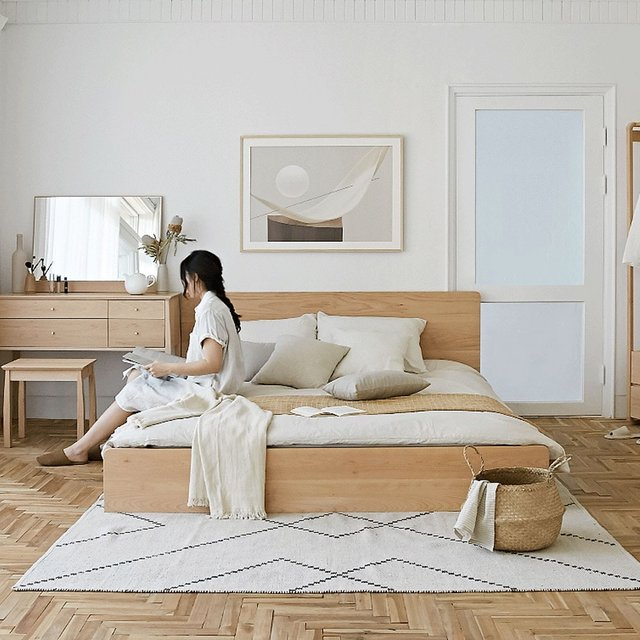

In [3]:
# !wget C:\Code\project\deep learning\datas\bed_55795.png -q -O input.jpg
im = cv2.imread("/content/drive/MyDrive/Colab Notebooks/bed_54564.png")
cv2_imshow(im)

# Object Detection

In [4]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

model_final_f10217.pkl: 178MB [00:07, 24.9MB/s]                           
/usr/local/lib/python3.6/dist-packages/detectron2/modeling/roi_heads/fast_rcnn.py:124: UserWarning: This overload of nonzero is deprecated:
	nonzero()
Consider using one of the following signatures instead:
	nonzero(*, bool as_tuple) (Triggered internally at  /pytorch/torch/csrc/utils/python_arg_parser.cpp:882.)
  filter_inds = filter_mask.nonzero()


In [5]:
print(outputs["instances"].pred_classes)
print(outputs["instances"].pred_boxes)

tensor([ 0, 59, 75, 75, 58], device='cuda:0')
Boxes(tensor([[ 38.0373, 249.4327, 247.2323, 465.4586],
        [ 29.6804, 286.7626, 572.2327, 534.1513],
        [156.6927, 262.4166, 168.9392, 292.1446],
        [123.8042, 272.4042, 149.3442, 294.4478],
        [131.2823, 214.6453, 196.6833, 292.9135]], device='cuda:0'))


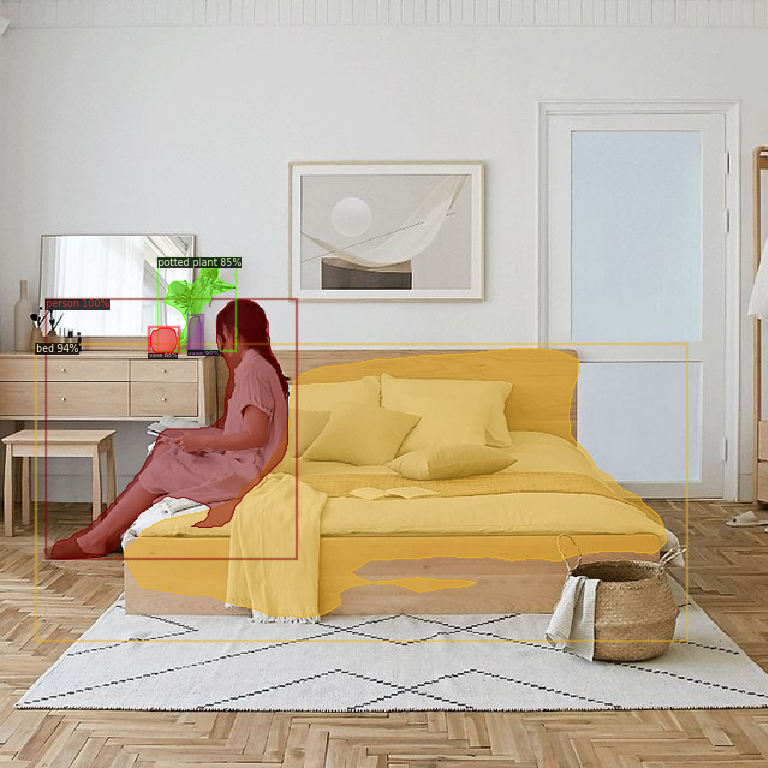

In [6]:
# We can use `Visualizer` to draw the predictions on the image.
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(out.get_image()[:, :, ::-1])

# Write object to image file

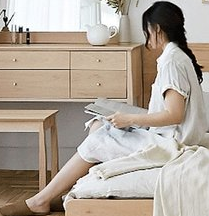

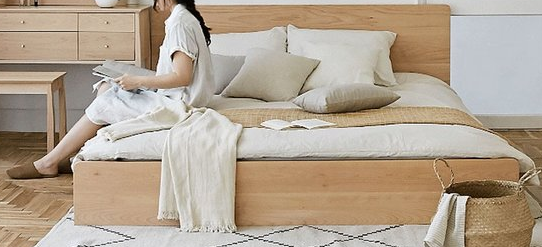

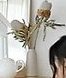

In [16]:
for cls, xy in zip(outputs["instances"].pred_classes, outputs["instances"].pred_boxes):
  xy = list(map(round, xy.tolist()))
  dst = im[xy[1]:xy[3], xy[0]:xy[2]].copy()
  cv2_imshow(dst)
  obj = MetadataCatalog.get(cfg.DATASETS.TRAIN[0]).thing_classes[cls]
  cv2.imwrite("/content/drive/MyDrive/Colab Notebooks/datas/{}.png".format(obj), dst)

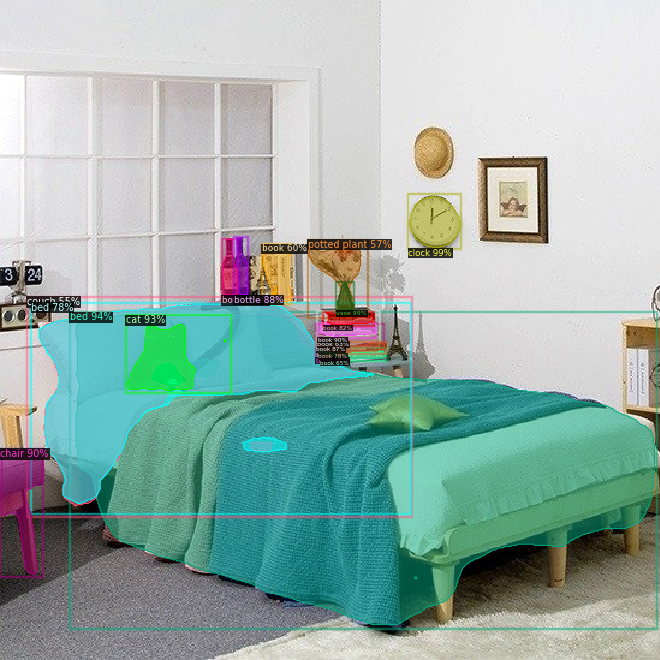

In [8]:
im2 = cv2.imread("/content/drive/MyDrive/Colab Notebooks/bed_136682.png")
outputs2 = predictor(im2)
v2 = Visualizer(im2[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out2 = v2.draw_instance_predictions(outputs2["instances"].to("cpu"))
cv2_imshow(out2.get_image()[:, :, ::-1])

# Comparing histograms

In [6]:
from __future__ import print_function
from __future__ import division
import cv2 as cv
import numpy as np
import pandas as pd

src_base = cv.imread('/content/drive/MyDrive/Colab Notebooks/datas/bed.png')
src_test1 = cv.imread('/content/drive/MyDrive/Colab Notebooks/datas/bed_54581.png')
src_test2 = cv.imread('/content/drive/MyDrive/Colab Notebooks/datas/bed_85276.png')

if src_base is None or src_test1 is None or src_test2 is None:
    print('Could not open or find the images!')
    exit(0)

hsv_base = cv.cvtColor(src_base, cv.COLOR_BGR2HSV)
hsv_test1 = cv.cvtColor(src_test1, cv.COLOR_BGR2HSV)
hsv_test2 = cv.cvtColor(src_test2, cv.COLOR_BGR2HSV)
hsv_half_down = hsv_base[hsv_base.shape[0]//2:,:]

h_bins = 50
s_bins = 60
histSize = [h_bins, s_bins]

# hue varies from 0 to 179, saturation from 0 to 255
h_ranges = [0, 180]
s_ranges = [0, 256]
ranges = h_ranges + s_ranges # concat lists

# Use the 0-th and 1-st channels
channels = [0, 1]
hist_base = cv.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_half_down = cv.calcHist([hsv_half_down], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_half_down, hist_half_down, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test1 = cv.calcHist([hsv_test1], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test1, hist_test1, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)
hist_test2 = cv.calcHist([hsv_test2], channels, None, histSize, ranges, accumulate=False)
cv.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv.NORM_MINMAX)

df = []

for compare_method in range(4):
    base_base = cv.compareHist(hist_base, hist_base, compare_method)
    base_half = cv.compareHist(hist_base, hist_half_down, compare_method)
    base_test1 = cv.compareHist(hist_base, hist_test1, compare_method)
    base_test2 = cv.compareHist(hist_base, hist_test2, compare_method)
    df.append({base_base, base_half, base_test1, base_test2})

pd.DataFrame(df, columns = ['Input-Input', 'Input-Half', 'Input-Test1', 'Input-Test2'], index = ['Correlation', 'Chi-square', 'Intersection', 'Bhattacharyya'])

,Input-Input,Input-Half,Input-Test1,Input-Test2
Correlation,0.887404,1.000000,0.314612,0.359966
Chi-square,0.000000,603.683317,4.217753,31.825348
Intersection,18.061100,3.426656,5.143728,23.057872
Bhattacharyya,0.000000,0.226739,0.488884,0.564270
